# A deep learning demo

This is a Jupyter notebook, live in your browser, with executable Python code!

In [5]:
a = 10
b = 4*8
print(a+b)

42


# Use a pre-trained neural network

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [7]:
# load the model
model = VGG16()

In [15]:
# load an image from file
image = load_img("data/dogs-vs-cats/train/dogs/dog.1106.jpg", target_size=(224, 224))
#image = load_img("data/dogs-vs-cats/train/cats/cat.1553.jpg", target_size=(224, 224))

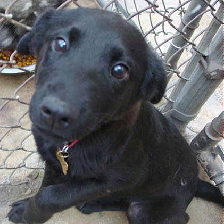

In [16]:
image

In [17]:
# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = np.expand_dims(image, axis=0)

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Labrador_retriever (28.66%)


It works!

# Train a small convolutional network from scratch

In [18]:
# location of dogs and cats
train_data_dir = "data/dogs-vs-cats/train"
validation_data_dir = "data/dogs-vs-cats/validation"

In [19]:
!ls -l "data/dogs-vs-cats/train"

total 72
drwxrwxr-x 2 gilles gilles 36864 Feb  5 15:46 cats
drwxrwxr-x 2 gilles gilles 36864 Feb  5 15:47 dogs


In [20]:
!ls -l "data/dogs-vs-cats/train/dogs" 

total 25860
-rw-r--r-- 1 gilles gilles 23241 Sep 20  2013 dog.1000.jpg
-rw-r--r-- 1 gilles gilles 24211 Sep 20  2013 dog.1001.jpg
-rw-r--r-- 1 gilles gilles  6850 Sep 20  2013 dog.1002.jpg
-rw-r--r-- 1 gilles gilles  5815 Sep 20  2013 dog.1003.jpg
-rw-r--r-- 1 gilles gilles 10281 Sep 20  2013 dog.1004.jpg
-rw-r--r-- 1 gilles gilles 41599 Sep 20  2013 dog.1005.jpg
-rw-r--r-- 1 gilles gilles 31245 Sep 20  2013 dog.1006.jpg
-rw-r--r-- 1 gilles gilles 16480 Sep 20  2013 dog.1007.jpg
-rw-r--r-- 1 gilles gilles 14643 Sep 20  2013 dog.1008.jpg
-rw-r--r-- 1 gilles gilles 30480 Sep 20  2013 dog.1009.jpg
-rw-r--r-- 1 gilles gilles 10539 Sep 20  2013 dog.1010.jpg
-rw-r--r-- 1 gilles gilles 16359 Sep 20  2013 dog.1011.jpg
-rw-r--r-- 1 gilles gilles  4785 Sep 20  2013 dog.1012.jpg
-rw-r--r-- 1 gilles gilles 26335 Sep 20  2013 dog.1013.jpg
-rw-r--r-- 1 gilles gilles 33499 Sep 20  2013 dog.1014.jpg
-rw-r--r-- 1 gilles gilles 34400 Sep 20  2013 dog.1015.jpg
-rw-r--r-- 1 gilles gilles 12250 Sep 20  201

In [21]:
# data iterators
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

validation_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [22]:
# convolutional network
from keras.models import Model 
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

input_shape = (img_width, img_height, 3)

inputs = Input(shape=input_shape)
h = Conv2D(32, (3, 3), activation="relu")(inputs)
h = MaxPooling2D(pool_size=(2, 2))(h)
h = Conv2D(32, (3, 3), activation="relu")(h)
h = MaxPooling2D(pool_size=(2, 2))(h)
h = Conv2D(32, (3, 3), activation="relu")(h)
h = MaxPooling2D(pool_size=(2, 2))(h)
h = Flatten()(h)
h = Dense(64, activation="relu")(h)
h = Dropout(0.5)(h)
predictions = Dense(1, activation="sigmoid")(h)

model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [23]:
# train
nb_train_samples = 2000
nb_validation_samples = 2000
epochs = 10

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
62/62 [==============================] - 36s 580ms/step - loss: 0.7035 - acc: 0.5076 - val_loss: 0.6881 - val_acc: 0.5030
Epoch 2/10
62/62 [==============================] - 36s 584ms/step - loss: 0.6833 - acc: 0.5816 - val_loss: 0.6828 - val_acc: 0.5600
Epoch 3/10
62/62 [==============================] - 32s 509ms/step - loss: 0.6645 - acc: 0.6028 - val_loss: 0.6396 - val_acc: 0.6616
Epoch 4/10
62/62 [==============================] - 32s 511ms/step - loss: 0.6392 - acc: 0.6462 - val_loss: 0.6233 - val_acc: 0.6687
Epoch 5/10
62/62 [==============================] - 32s 514ms/step - loss: 0.6151 - acc: 0.6699 - val_loss: 0.5893 - val_acc: 0.6961
Epoch 6/10
62/62 [==============================] - 32s 515ms/step - loss: 0.5908 - acc: 0.6890 - val_loss: 0.5902 - val_acc: 0.6997
Epoch 7/10
62/62 [==============================] - 34s 555ms/step - loss: 0.5803 - acc: 0.6986 - val_loss: 0.5593 - val_acc: 0.7175
Epoch 8/10
62/62 [==============================] - 33s 527ms/step - 

Final accuracy at 70%.

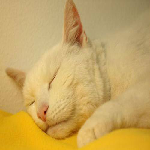

In [38]:
# sample prediction 1
img_path = "data/dogs-vs-cats/validation/cats/cat.2798.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [39]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)[0, 0]

0.0

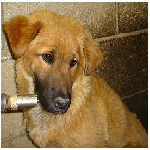

In [44]:
# sample prediction 2
img_path = "data/dogs-vs-cats/validation/dogs/dog.2774.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [45]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)

array([[0.8721457]], dtype=float32)

# Fine-tune the top layer of a pre-trained network

In [49]:
# location of dogs and cats
train_data_dir = "data/dogs-vs-cats/train"
validation_data_dir = "data/dogs-vs-cats/validation"

# data iterators
from keras.preprocessing.image import ImageDataGenerator

img_width, img_height = (224, 224)
batch_size = 32

def preprocess_input_vgg(x):
    X = np.expand_dims(x, axis=0)
    X = preprocess_input(X)
    return X[0]

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input_vgg,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_vgg)

validation_generator = validation_datagen.flow_from_directory(
    directory=validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [50]:
# load vgg16 and fine-tune its top layer
from keras.applications import VGG16
from keras.layers import Dense
from keras.models import Model 

base_model = VGG16(weights="imagenet")
h = base_model.get_layer("fc2").output
predictions = Dense(1, activation="sigmoid", name="predictions")(h)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers:
    if layer.name in ["predictions"]:
        continue
    layer.trainable = False
    
model.compile(optimizer="rmsprop", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [51]:
# train
nb_train_samples = 2000
nb_validation_samples = 2000
epochs = 1

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/1
 1/62 [..............................] - ETA: 11:32 - loss: 1.2157 - acc: 0.3438

KeyboardInterrupt: 

Final accuracy at 98%!

In [ ]:
# sample prediction 1
img_path = "data/dogs-vs-cats/validation/cats/cat.2010.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [ ]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)

In [ ]:
# sample prediction 2
img_path = "data/dogs-vs-cats/validation/dogs/dog.2012.jpg"
image = load_img(img_path, target_size=(img_width, img_height))
image

In [ ]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
model.predict(image)